In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn.ensemble import RandomForestClassifier

# Sampling
* 데이터가 너무 많아서 일단 10000개씩 잘라서 샘플링 해보기

In [2]:
data = pd.read_csv('lezhin_dataset_v2_training.tsv.gz', sep='\t')
data.head()

,0,0.1,0.2,0.3,1,1.1,001C9D9B,8337B6FB,1.2,Unnamed: 9,...,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,0.258,0.003,Unnamed: 165,Unnamed: 166
0,0,0,0,0,1,1,001C9D9B,90D8AB70,1,NaN,...,NaN,0.5000,NaN,NaN,NaN,NaN,0.5000,NaN,NaN,NaN
1,0,0,0,0,1,1,001C9D9B,ABC21E80,1,NaN,...,NaN,0.0187,0.0047,NaN,NaN,NaN,0.0287,0.0055,NaN,NaN
2,0,0,0,0,1,1,001C9D9B,C17967D1,0,69EF2C8F,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0186,NaN,NaN,NaN
3,0,0,0,0,1,1,002B4BDE,AF145784,0,NaN,...,NaN,0.0207,NaN,NaN,NaN,NaN,0.2805,0.0692,NaN,NaN
4,0,0,0,0,1,1,002B4BDE,DC2D76A1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1245,NaN,NaN,NaN


* Feature Name 설정

In [3]:
use_platform = ['Use_{}'.format(i) for i in ['A','B','C','D']]
personal_info = ['Personal_i_{}'.format(i) for i in range(7,10)]
major_work_purchase = ['Major_work_purchase_{}'.format(i) for i in range(10,110)]
schedule_info = ['Sche_i_{}'.format(i) for i in range(113, 123)]
genre_info = ['Genre_i_{}'.format(i) for i in range(123, 141)]
work_tag_info = ['Work_tag_i_{}'.format(i) for i in range(145, 151)]
user_tendency_info = ['User_ten_i_{}'.format(i) for i in range(151, 167)]

In [4]:
columns = ['Purchase_work', use_platform, 'Total_visit_n(Sequential ID)',
           'Work(hash)', personal_info,
            major_work_purchase, 'Work_tag_i_110', 'Needed_coin',
           'conclusion', schedule_info, genre_info,
           'Final_epi_issued time(sequential ID)', 'Seperate_Volume',
           'Work_issued_time(sequential ID)', 
           'Total_issued_episode_num(sequential ID)',
            work_tag_info, user_tendency_info]

In [5]:
def make_columns_list(lst):
    final_column = []
    for i in lst:
        if type(i) == str:
            final_column.append(i)
        elif type(i) == list:
            final_column.extend(i)
    return final_column
data.columns = make_columns_list(columns)
data.head()

,Purchase_work,Use_A,Use_B,Use_C,Use_D,Total_visit_n(Sequential ID),Work(hash),Personal_i_7,Personal_i_8,Personal_i_9,...,User_ten_i_157,User_ten_i_158,User_ten_i_159,User_ten_i_160,User_ten_i_161,User_ten_i_162,User_ten_i_163,User_ten_i_164,User_ten_i_165,User_ten_i_166
0,0,0,0,0,1,1,001C9D9B,90D8AB70,1,NaN,...,NaN,0.5000,NaN,NaN,NaN,NaN,0.5000,NaN,NaN,NaN
1,0,0,0,0,1,1,001C9D9B,ABC21E80,1,NaN,...,NaN,0.0187,0.0047,NaN,NaN,NaN,0.0287,0.0055,NaN,NaN
2,0,0,0,0,1,1,001C9D9B,C17967D1,0,69EF2C8F,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0186,NaN,NaN,NaN
3,0,0,0,0,1,1,002B4BDE,AF145784,0,NaN,...,NaN,0.0207,NaN,NaN,NaN,NaN,0.2805,0.0692,NaN,NaN
4,0,0,0,0,1,1,002B4BDE,DC2D76A1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1245,NaN,NaN,NaN


* 컬럼별 이름 생성한 데이터프레임 저장

In [6]:
# use_exist_column_df = data
# use_exist_column_df.to_pickle("train.pkl")

# Feature Importance 뽑아보기 

C:\Users\ktcm1\Miniconda3\envs\ml_python\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)



seed값 : 333
Feature ranking:
1. feature 147, name : User_ten_i_152, importance : 0.20007419293286044.
2. feature 150, name : User_ten_i_155, importance : 0.15612820209038558.
3. feature 148, name : User_ten_i_153, importance : 0.06989679861673548.
4. feature 149, name : User_ten_i_154, importance : 0.05010007557826544.
5. feature 85, name : Major_work_purchase_90, importance : 0.0486783821974754.
6. feature 14, name : Major_work_purchase_19, importance : 0.04276006877602613.
7. feature 12, name : Major_work_purchase_17, importance : 0.04125509300916164.
8. feature 46, name : Major_work_purchase_51, importance : 0.03797091699678734.
9. feature 3, name : Use_D, importance : 0.03683395980358572.
10. feature 158, name : User_ten_i_163, importance : 0.028386155349087134.
11. feature 52, name : Major_work_purchase_57, importance : 0.027790272883994816.
12. feature 151, name : User_ten_i_156, importance : 0.027093552391569475.
13. feature 115, name : Sche_i_120, importance : 0.02508355984148

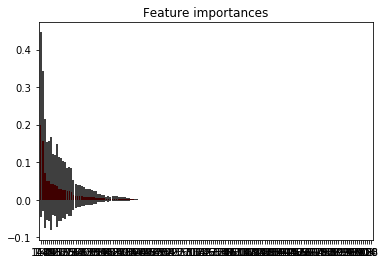

seed값 : 444


C:\Users\ktcm1\Miniconda3\envs\ml_python\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Feature ranking:
1. feature 119, name : Genre_i_124, importance : 0.1329024149099474.
2. feature 158, name : User_ten_i_163, importance : 0.08168713081426722.
3. feature 22, name : Major_work_purchase_27, importance : 0.062065442462899786.
4. feature 147, name : User_ten_i_152, importance : 0.052321063913577805.
5. feature 3, name : Use_D, importance : 0.04780732224044059.
6. feature 105, name : Work_tag_i_110, importance : 0.04527293612572256.
7. feature 17, name : Major_work_purchase_22, importance : 0.041815188083592386.
8. feature 16, name : Major_work_purchase_21, importance : 0.0413852727306062.
9. feature 14, name : Major_work_purchase_19, importance : 0.040803019262465136.
10. feature 150, name : User_ten_i_155, importance : 0.034756746366310355.
11. feature 136, name : Final_epi_issued time(sequential ID), importance : 0.03434935805116384.
12. feature 154, name : User_ten_i_159, importance : 0.03300961438016888.
13. feature 12, name : Major_work_purchase_17, importance : 0.031

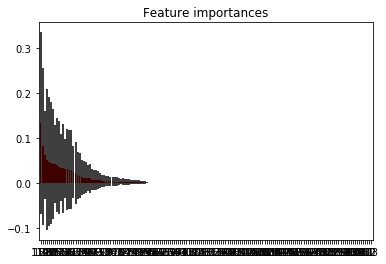

seed값 : 555


C:\Users\ktcm1\Miniconda3\envs\ml_python\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Feature ranking:
1. feature 105, name : Work_tag_i_110, importance : 0.08703984449836784.
2. feature 119, name : Genre_i_124, importance : 0.07499179064962033.
3. feature 154, name : User_ten_i_159, importance : 0.06863571859035102.
4. feature 56, name : Major_work_purchase_61, importance : 0.06120322513898198.
5. feature 9, name : Major_work_purchase_14, importance : 0.057909407629830524.
6. feature 150, name : User_ten_i_155, importance : 0.054268159872712954.
7. feature 147, name : User_ten_i_152, importance : 0.050087227037874785.
8. feature 92, name : Major_work_purchase_97, importance : 0.038638230609151655.
9. feature 41, name : Major_work_purchase_46, importance : 0.03441140600078664.
10. feature 45, name : Major_work_purchase_50, importance : 0.034173656626787834.
11. feature 50, name : Major_work_purchase_55, importance : 0.03333732375967443.
12. feature 159, name : User_ten_i_164, importance : 0.033191935283272946.
13. feature 48, name : Major_work_purchase_53, importance : 

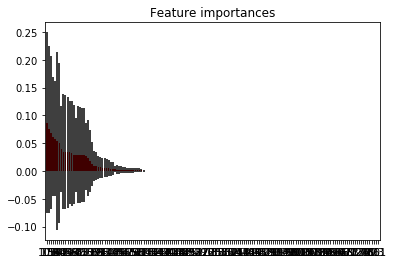

seed값 : 666


C:\Users\ktcm1\Miniconda3\envs\ml_python\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Feature ranking:
1. feature 105, name : Work_tag_i_110, importance : 0.22684845653804206.
2. feature 147, name : User_ten_i_152, importance : 0.0749273901069715.
3. feature 158, name : User_ten_i_163, importance : 0.06666020339788781.
4. feature 149, name : User_ten_i_154, importance : 0.06241859733411596.
5. feature 14, name : Major_work_purchase_19, importance : 0.05978699512737094.
6. feature 17, name : Major_work_purchase_22, importance : 0.05244995501339885.
7. feature 50, name : Major_work_purchase_55, importance : 0.03464412462213667.
8. feature 3, name : Use_D, importance : 0.033619150980917036.
9. feature 9, name : Major_work_purchase_14, importance : 0.032859336176261.
10. feature 43, name : Major_work_purchase_48, importance : 0.031988759021789284.
11. feature 51, name : Major_work_purchase_56, importance : 0.030252275882906243.
12. feature 92, name : Major_work_purchase_97, importance : 0.02950916286519405.
13. feature 75, name : Major_work_purchase_80, importance : 0.02491

150. feature 111, name : Sche_i_116, importance : 0.0.
151. feature 110, name : Sche_i_115, importance : 0.0.
152. feature 109, name : Sche_i_114, importance : 0.0.
153. feature 108, name : Sche_i_113, importance : 0.0.
154. feature 106, name : Needed_coin, importance : 0.0.
155. feature 97, name : Major_work_purchase_102, importance : 0.0.
156. feature 104, name : Major_work_purchase_109, importance : 0.0.
157. feature 103, name : Major_work_purchase_108, importance : 0.0.
158. feature 102, name : Major_work_purchase_107, importance : 0.0.
159. feature 101, name : Major_work_purchase_106, importance : 0.0.
160. feature 100, name : Major_work_purchase_105, importance : 0.0.
161. feature 98, name : Major_work_purchase_103, importance : 0.0.
162. feature 0, name : Use_A, importance : 0.0.


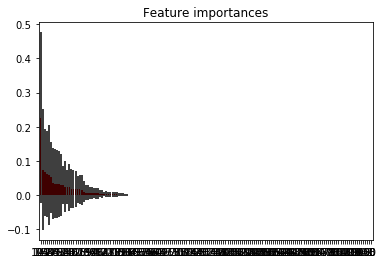

seed값 : 777


C:\Users\ktcm1\Miniconda3\envs\ml_python\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Feature ranking:
1. feature 148, name : User_ten_i_153, importance : 0.15551707294348266.
2. feature 119, name : Genre_i_124, importance : 0.102489522608791.
3. feature 158, name : User_ten_i_163, importance : 0.06696257910310607.
4. feature 149, name : User_ten_i_154, importance : 0.06617067644306014.
5. feature 17, name : Major_work_purchase_22, importance : 0.060980575122225135.
6. feature 56, name : Major_work_purchase_61, importance : 0.049530161798557376.
7. feature 115, name : Sche_i_120, importance : 0.0436741578458219.
8. feature 150, name : User_ten_i_155, importance : 0.04108446258263501.
9. feature 6, name : Major_work_purchase_11, importance : 0.04094153333476337.
10. feature 3, name : Use_D, importance : 0.03746603327020732.
11. feature 77, name : Major_work_purchase_82, importance : 0.03507021319467306.
12. feature 12, name : Major_work_purchase_17, importance : 0.02384711442320537.
13. feature 84, name : Major_work_purchase_89, importance : 0.022284480136233784.
14. fea

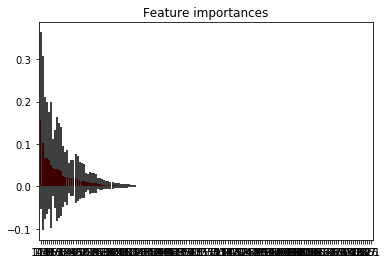

,333,444,555,666,777
0,User_ten_i_152,Genre_i_124,Work_tag_i_110,Work_tag_i_110,User_ten_i_153
1,0.200074,0.132902,0.0870398,0.226848,0.155517
0,User_ten_i_155,User_ten_i_163,Genre_i_124,User_ten_i_152,Genre_i_124
1,0.156128,0.0816871,0.0749918,0.0749274,0.10249
0,User_ten_i_153,Major_work_purchase_27,User_ten_i_159,User_ten_i_163,User_ten_i_163
1,0.0698968,0.0620654,0.0686357,0.0666602,0.0669626
0,User_ten_i_154,User_ten_i_152,Major_work_purchase_61,User_ten_i_154,User_ten_i_154
1,0.0501001,0.0523211,0.0612032,0.0624186,0.0661707
0,Major_work_purchase_90,Use_D,Major_work_purchase_14,Major_work_purchase_19,Major_work_purchase_22
1,0.0486784,0.0478073,0.0579094,0.059787,0.0609806


In [9]:
def check_feature_importance(df):
    seed_list = [333,444,555,666,777]
    rank_df = pd.DataFrame()
    drop_list = ['Work(hash)', 'Personal_i_7', 'Personal_i_8', 'Personal_i_9'] 
    for i in seed_list:
        np.random.seed(i)
        print("="*20)
        print("seed값 : {}".format(i))
        print("="*20)
        sample_i = df.loc[np.random.choice(data.index, 10000)]
        sample_i.fillna(0, inplace=True)
        sample_i_clean = sample_i.drop(drop_list, axis=1)
        rf = RandomForestClassifier(max_depth=3, n_jobs=-1)
        X_features, target = sample_i_clean.iloc[:, 1:], sample_i_clean.iloc[:, 0]
        rf.fit(X_features, target)
        importance = rf.feature_importances_
        std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
        indices = np.argsort(importance)[::-1]

        print("Feature ranking:")
        rank_series = pd.Series([])
        for f in range(X_features.shape[1]):
            print("{}. feature {}, name : {}, importance : {}.".format(f + 1, indices[f], 
                                                                X_features.columns[indices[f]], 
                                                                importance[indices[f]]))
            rank_series = rank_series.append(pd.Series([X_features.columns[indices[f]],
                                                       importance[indices[f]]]))
        rank_df.insert(len(rank_df.columns), column=i, value=rank_series)
        
        plt.figure()
        plt.title("Feature importances")
        plt.bar(range(X_features.shape[1]), importance[indices],
               color="r", yerr=std[indices], align="center")
        plt.xticks(range(X_features.shape[1]), indices)
        plt.xlim([-1, X_features.shape[1]])
        plt.show()
    return rank_df
data_copy_df = data.copy()
check_feature_importance(data_copy_df)

* 데이터 100000개 샘플링

seed값 : 333


C:\Users\ktcm1\Miniconda3\envs\ml_python\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Feature ranking:
1. feature 119, name : Genre_i_124, importance : 0.24610458851638062.
2. feature 105, name : Work_tag_i_110, importance : 0.1113793709978131.
3. feature 158, name : User_ten_i_163, importance : 0.09558147032649877.
4. feature 147, name : User_ten_i_152, importance : 0.0870520895486814.
5. feature 6, name : Major_work_purchase_11, importance : 0.04460453228135411.
6. feature 14, name : Major_work_purchase_19, importance : 0.037089228299188134.
7. feature 1, name : Use_B, importance : 0.033236649055896315.
8. feature 22, name : Major_work_purchase_27, importance : 0.03028994164200377.
9. feature 77, name : Major_work_purchase_82, importance : 0.029389387877462942.
10. feature 159, name : User_ten_i_164, importance : 0.02539292792662453.
11. feature 9, name : Major_work_purchase_14, importance : 0.02535536095535391.
12. feature 26, name : Major_work_purchase_31, importance : 0.021440597827128056.
13. feature 23, name : Major_work_purchase_28, importance : 0.02104817862249

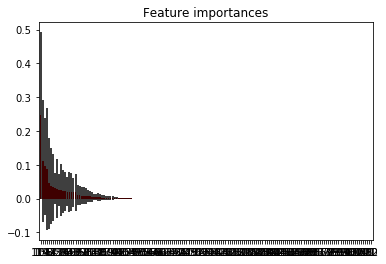

seed값 : 444


C:\Users\ktcm1\Miniconda3\envs\ml_python\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Feature ranking:
1. feature 105, name : Work_tag_i_110, importance : 0.13616944692875427.
2. feature 147, name : User_ten_i_152, importance : 0.11961432368114563.
3. feature 3, name : Use_D, importance : 0.11803816308882698.
4. feature 159, name : User_ten_i_164, importance : 0.09772923591376917.
5. feature 148, name : User_ten_i_153, importance : 0.057399849138612014.
6. feature 149, name : User_ten_i_154, importance : 0.045246223307818766.
7. feature 70, name : Major_work_purchase_75, importance : 0.043974201926098265.
8. feature 15, name : Major_work_purchase_20, importance : 0.03600018342787277.
9. feature 119, name : Genre_i_124, importance : 0.03365561906027386.
10. feature 1, name : Use_B, importance : 0.03118198591881276.
11. feature 158, name : User_ten_i_163, importance : 0.030883862332790675.
12. feature 2, name : Use_C, importance : 0.027104470819870174.
13. feature 84, name : Major_work_purchase_89, importance : 0.026833457599962345.
14. feature 22, name : Major_work_purch

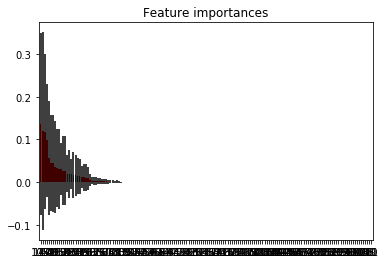

seed값 : 555


C:\Users\ktcm1\Miniconda3\envs\ml_python\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Feature ranking:
1. feature 150, name : User_ten_i_155, importance : 0.14138081646880973.
2. feature 148, name : User_ten_i_153, importance : 0.09191046508634196.
3. feature 158, name : User_ten_i_163, importance : 0.08916981536445331.
4. feature 22, name : Major_work_purchase_27, importance : 0.07544188197287058.
5. feature 147, name : User_ten_i_152, importance : 0.07496215710804931.
6. feature 105, name : Work_tag_i_110, importance : 0.04928925381745641.
7. feature 10, name : Major_work_purchase_15, importance : 0.0415332419943532.
8. feature 14, name : Major_work_purchase_19, importance : 0.04062067309162412.
9. feature 16, name : Major_work_purchase_21, importance : 0.03427833910867441.
10. feature 70, name : Major_work_purchase_75, importance : 0.030407558349773666.
11. feature 6, name : Major_work_purchase_11, importance : 0.028688069631090503.
12. feature 57, name : Major_work_purchase_62, importance : 0.02834986209173183.
13. feature 12, name : Major_work_purchase_17, importan

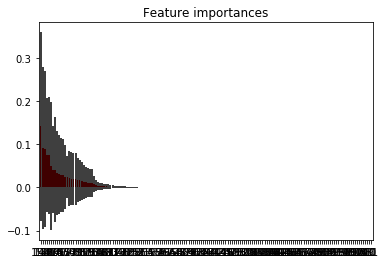

seed값 : 666


C:\Users\ktcm1\Miniconda3\envs\ml_python\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Feature ranking:
1. feature 105, name : Work_tag_i_110, importance : 0.16558621200465917.
2. feature 147, name : User_ten_i_152, importance : 0.06391094055930913.
3. feature 150, name : User_ten_i_155, importance : 0.062133406020266825.
4. feature 41, name : Major_work_purchase_46, importance : 0.061550192075390274.
5. feature 9, name : Major_work_purchase_14, importance : 0.04756765680129734.
6. feature 149, name : User_ten_i_154, importance : 0.04641461949688648.
7. feature 119, name : Genre_i_124, importance : 0.043827716181564905.
8. feature 148, name : User_ten_i_153, importance : 0.0436116360355905.
9. feature 56, name : Major_work_purchase_61, importance : 0.04179111807982595.
10. feature 15, name : Major_work_purchase_20, importance : 0.036982214414111855.
11. feature 6, name : Major_work_purchase_11, importance : 0.036066979820205694.
12. feature 158, name : User_ten_i_163, importance : 0.03382224125762993.
13. feature 88, name : Major_work_purchase_93, importance : 0.03062529

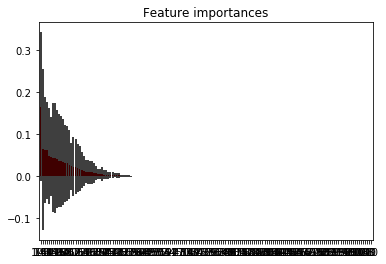

seed값 : 777


C:\Users\ktcm1\Miniconda3\envs\ml_python\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Feature ranking:
1. feature 105, name : Work_tag_i_110, importance : 0.1456003512475039.
2. feature 147, name : User_ten_i_152, importance : 0.1265519167470081.
3. feature 148, name : User_ten_i_153, importance : 0.11168137625927148.
4. feature 150, name : User_ten_i_155, importance : 0.0883160049372515.
5. feature 158, name : User_ten_i_163, importance : 0.05266886242959986.
6. feature 52, name : Major_work_purchase_57, importance : 0.05091085541775011.
7. feature 159, name : User_ten_i_164, importance : 0.036839548541450315.
8. feature 43, name : Major_work_purchase_48, importance : 0.036258047177973665.
9. feature 41, name : Major_work_purchase_46, importance : 0.03444162064870101.
10. feature 84, name : Major_work_purchase_89, importance : 0.031897731652801395.
11. feature 23, name : Major_work_purchase_28, importance : 0.02593979540587198.
12. feature 81, name : Major_work_purchase_86, importance : 0.025675391540570868.
13. feature 138, name : Work_issued_time(sequential ID), impo

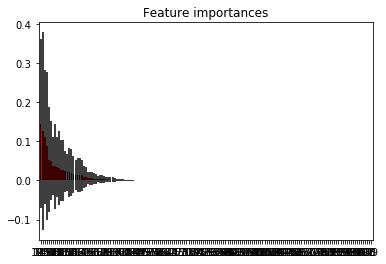

,333,444,555,666,777
0,Genre_i_124,Work_tag_i_110,User_ten_i_155,Work_tag_i_110,Work_tag_i_110
1,0.246105,0.136169,0.141381,0.165586,0.1456
0,Work_tag_i_110,User_ten_i_152,User_ten_i_153,User_ten_i_152,User_ten_i_152
1,0.111379,0.119614,0.0919105,0.0639109,0.126552
0,User_ten_i_163,Use_D,User_ten_i_163,User_ten_i_155,User_ten_i_153
1,0.0955815,0.118038,0.0891698,0.0621334,0.111681
0,User_ten_i_152,User_ten_i_164,Major_work_purchase_27,Major_work_purchase_46,User_ten_i_155
1,0.0870521,0.0977292,0.0754419,0.0615502,0.088316
0,Major_work_purchase_11,User_ten_i_153,User_ten_i_152,Major_work_purchase_14,User_ten_i_163
1,0.0446045,0.0573998,0.0749622,0.0475677,0.0526689


In [10]:
def check_feature_importance(df):
    seed_list = [333,444,555,666,777]
    rank_df = pd.DataFrame()
    drop_list = ['Work(hash)', 'Personal_i_7', 'Personal_i_8', 'Personal_i_9']
    for i in seed_list:
        np.random.seed(i)
        print("="*20)
        print("seed값 : {}".format(i))
        sample_i = df.loc[np.random.choice(data.index, 100000)]
        sample_i.fillna(0, inplace=True)
        sample_i_clean = sample_i.drop(drop_list, axis=1)
        rf = RandomForestClassifier(max_depth=3, n_jobs=-1)
        X_features, target = sample_i_clean.iloc[:, 1:], sample_i_clean.iloc[:, 0]
        rf.fit(X_features, target)
        importance = rf.feature_importances_
        std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
        indices = np.argsort(importance)[::-1]

        print("Feature ranking:")
        rank_series = pd.Series([])
        for f in range(X_features.shape[1]):
            print("{}. feature {}, name : {}, importance : {}.".format(f + 1, indices[f], 
                                                                X_features.columns[indices[f]], 
                                                                importance[indices[f]]))
            rank_series = rank_series.append(pd.Series([X_features.columns[indices[f]],
                                                       importance[indices[f]]]))
        rank_df.insert(len(rank_df.columns), column=i, value=rank_series)
        
        plt.figure()
        plt.title("Feature importances")
        plt.bar(range(X_features.shape[1]), importance[indices],
               color="r", yerr=std[indices], align="center")
        plt.xticks(range(X_features.shape[1]), indices)
        plt.xlim([-1, X_features.shape[1]])
        plt.show()
    return rank_df
data_copy_df = data.copy()
check_feature_importance(data_copy_df)